In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import integrate, optimize

In [3]:
df = pd.read_csv('data/georgia_reported.csv')
df.head()

,Unnamed: 0,date,state,fips,cases,deaths
0,256,2020-03-02,Georgia,13,0,0
1,271,2020-03-03,Georgia,13,0,0
2,287,2020-03-04,Georgia,13,0,0
3,305,2020-03-05,Georgia,13,0,0
4,326,2020-03-06,Georgia,13,0,0


In [44]:
ycases = df['cases'].to_numpy()
ydeaths = df['deaths'].to_numpy()
ydata = np.hstack((ycases, ydeaths))
# ydata = np.concatenate(:)
ydata = np.array(ydata, dtype = float)


xdata = list(range(1, len(ycases)+1))
xdata = np.array(xdata, dtype=float)
ydata.shape
xdata.shape

(87,)

In [45]:
def sird_model(y, x, beta, gamma, mu):
    dS = -beta * y[0] * y[1] / N 
    dR = gamma * y[1]
    dM = mu * y[1]
    dI = -(dS + dR + dM)
    return dS, dI, dR, dM

beta  273.8152980580754
gamma  -0.033406390786987074
mu  0.014791342231075148
S0  1690.1222099951556
I0  11.152466749417632
R0 -906.3238838883427
D0 145.51202645032436



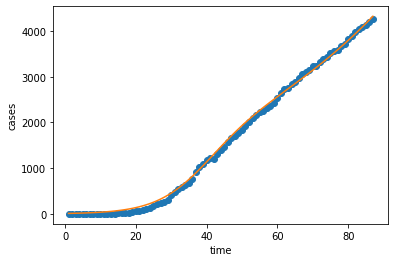

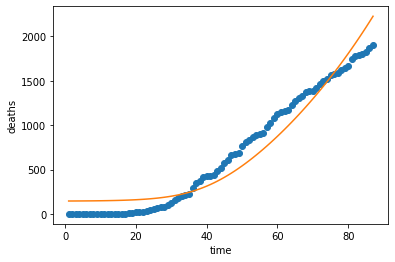

In [55]:
def fit_odeint(x, beta, gamma, mu, S0, I0, R0, M0):
    ret =  integrate.odeint(func = sird_model, y0 = (S0, I0, R0, M0), t = x, args=(beta, gamma, mu))
    i = ret[:,1]
    m = ret[:,3]
#     print(type(i))
    im = np.hstack((i,m))
#     print(im.shape)
    return im
    
                                                        



N = 3989167  ## it should be the population... not sure...

popt, pcov = optimize.curve_fit(f = fit_odeint, xdata = xdata, ydata = ydata, maxfev = 10000, p0 = (0.1, 0.1, 0.1, ycases[-1]*10, 1, 0, ydeaths[0]))


print('beta ', popt[0])
print('gamma ', popt[1])
print('mu ', popt[2])
print('S0 ', popt[3])
print('I0 ', popt[4])
print('R0', popt[5])
print('D0', popt[6])

[  11.15246675   12.75902428   14.59552919   16.69443637   19.09264187
   21.83204608   24.96017645   28.53087105   32.60502083   37.25137046
   42.54737224   48.5800825    55.44708715   63.25743182   72.13252741
   82.20698766   93.62934329  106.56256128  121.18428226  137.68665957
  156.27569056  177.16987461  200.59805482  226.79627342  256.00348732
  288.45601992  324.38065765  363.98641951  407.45510265  454.93087391
  506.50935403  562.22681939  622.0503215   685.86964803  753.49210336
  824.64103614  898.95877669  976.01439132 1055.31617015 1136.32827719
 1218.49049462 1301.23963573 1384.03098723 1466.3581537  1547.76992803
 1627.88300087 1706.39017387 1783.06379335 1857.75490697 1930.3887658
 2000.95756095 2069.51134906 2136.14803217 2201.00317817 2264.24026972
 2326.04181063 2386.60155084 2446.11794573 2504.78886518 2562.80748391
 2620.35923859 2677.6197118  2734.75329238 2791.91246752 2849.23761225
 2906.85715761 2964.88803666 3023.43632406 3082.59800103 3142.4597923
 3203.10

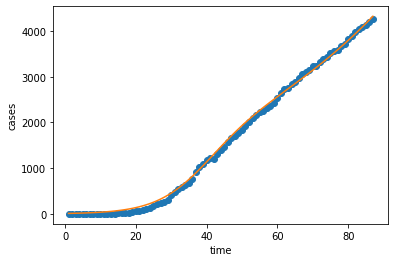

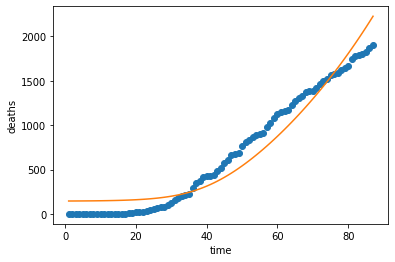

In [56]:
fitted = fit_odeint(xdata, *popt)

print('')


plt.plot(xdata, ycases, 'o', label='actual')
plt.plot(xdata, fitted[:len(ycases)], label='predicted')
plt.xlabel('time')
plt.ylabel('cases')

plt.show()




plt.plot(xdata, ydeaths, 'o', label='actual')
plt.plot(xdata, fitted[len(ycases):], label)
plt.xlabel('time')
plt.ylabel('deaths')


plt.show()

In [19]:
integrate.solve_ivp?

Signature:
integrate.solve_ivp(
    fun,
    t_span,
    y0,
    method='RK45',
    t_eval=None,
    dense_output=False,
    events=None,
    vectorized=False,
    **options,
)
Docstring:
Solve an initial value problem for a system of ODEs.

This function numerically integrates a system of ordinary differential
equations given an initial value::

    dy / dt = f(t, y)
    y(t0) = y0

Here t is a one-dimensional independent variable (time), y(t) is an
n-dimensional vector-valued function (state), and an n-dimensional
vector-valued function f(t, y) determines the differential equations.
The goal is to find y(t) approximately satisfying the differential
equations, given an initial value y(t0)=y0.

Some of the solvers support integration in the complex domain, but note that
for stiff ODE solvers, the right-hand side must be complex-differentiable
(satisfy Cauchy-Riemann equations [11]_). To solve a problem in the complex
domain, pass y0 with a complex data type. Another option is always to

In [ ]:
df = pd.DataFrame({
    'Actual': extended_actual,
    'S': prediction.y[0],
    'I': prediction.y[1],
    'R': prediction.y[2],
     'M'
})
fig, ax = plt.subplots(figsize=(15, 10))
ax.set_title(self.state)
df.plot(ax=ax)

In [25]:
integrate.odeint?

Signature:
integrate.odeint(
    func,
    y0,
    t,
    args=(),
    Dfun=None,
    col_deriv=0,
    full_output=0,
    ml=None,
    mu=None,
    rtol=None,
    atol=None,
    tcrit=None,
    h0=0.0,
    hmax=0.0,
    hmin=0.0,
    ixpr=0,
    mxstep=0,
    mxhnil=0,
    mxordn=12,
    mxords=5,
    printmessg=0,
    tfirst=False,
)
Docstring:
Integrate a system of ordinary differential equations.

.. note:: For new code, use `scipy.integrate.solve_ivp` to solve a
          differential equation.

Solve a system of ordinary differential equations using lsoda from the
FORTRAN library odepack.

Solves the initial value problem for stiff or non-stiff systems
of first order ode-s::

    dy/dt = func(y, t, ...)  [or func(t, y, ...)]

where y can be a vector.

.. note:: By default, the required order of the first two arguments of
          `func` are in the opposite order of the arguments in the system
          definition function used by the `scipy.integrate.ode` class and
          the 

In [24]:
optimize.curve_fit?

Signature:
optimize.curve_fit(
    f,
    xdata,
    ydata,
    p0=None,
    sigma=None,
    absolute_sigma=False,
    check_finite=True,
    bounds=(-inf, inf),
    method=None,
    jac=None,
    **kwargs,
)
Docstring:
Use non-linear least squares to fit a function, f, to data.

Assumes ``ydata = f(xdata, *params) + eps``

Parameters
----------
f : callable
    The model function, f(x, ...).  It must take the independent
    variable as the first argument and the parameters to fit as
    separate remaining arguments.
xdata : array_like or object
    The independent variable where the data is measured.
    Should usually be an M-length sequence or an (k,M)-shaped array for
    functions with k predictors, but can actually be any object.
ydata : array_like
    The dependent data, a length M array - nominally ``f(xdata, ...)``.
p0 : array_like, optional
    Initial guess for the parameters (length N).  If None, then the
    initial values will all be 1 (if the number of parameters for th